# Health Insurance Lead Analysis


## Wasay Ahmed 
### Do share your feedback so that i can be able to improve myself

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('train.csv')
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
data.shape

(50882, 14)

In [4]:
data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [6]:
data.select_dtypes(include='object').nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [7]:
data.dropna(inplace= True)
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2.0,1.0,20,13574.0,1
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [8]:
data.drop(columns = ['ID', 'City_Code', 'Region_Code'], inplace = True)


In [9]:
data.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
3,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
7,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1


In [10]:
data.shape

(23548, 11)

In [11]:
#these commands replaces the data which is in the column of Response in a form of 0 and 1 to no and yes

replace_value = {0: 'no', 1:'yes'}
data['Response'] = data['Response'].replace(replace_value)

In [12]:
data.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,no
3,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,no
4,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,no
5,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,yes
7,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,yes


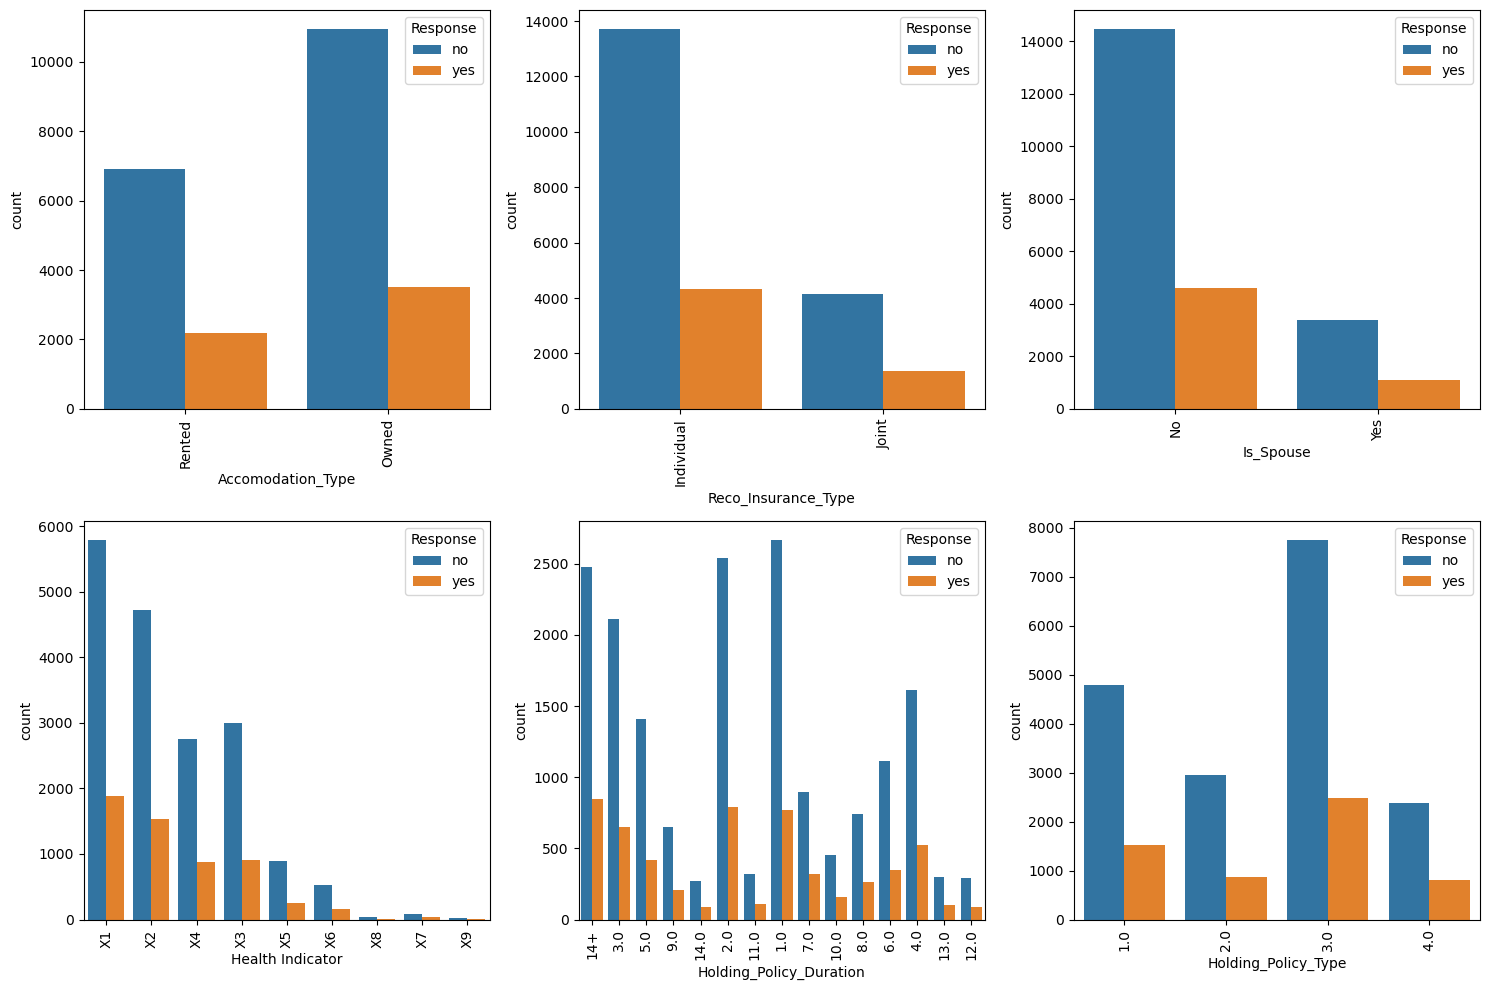

In [13]:
cat_vars = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 
            'Health Indicator', 'Holding_Policy_Duration',
            'Holding_Policy_Type']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Response', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()

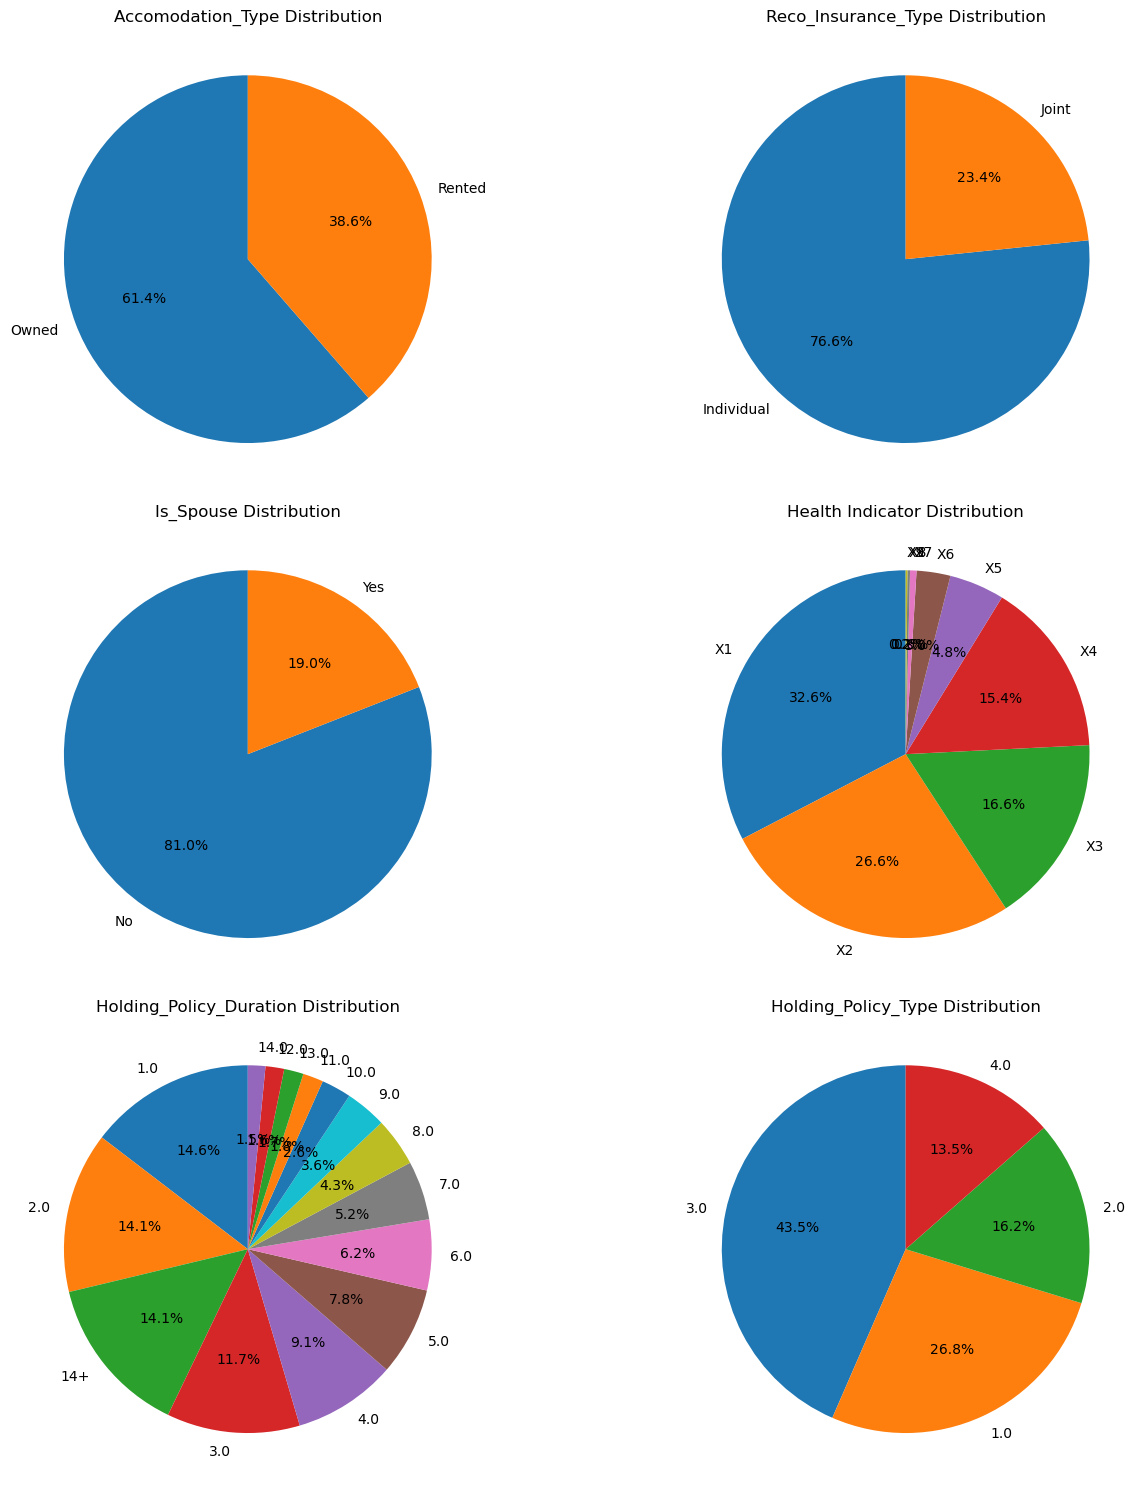

In [14]:
cat_vars = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 
            'Health Indicator', 'Holding_Policy_Duration',
            'Holding_Policy_Type']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = data[var].value_counts()

        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()

plt.show()

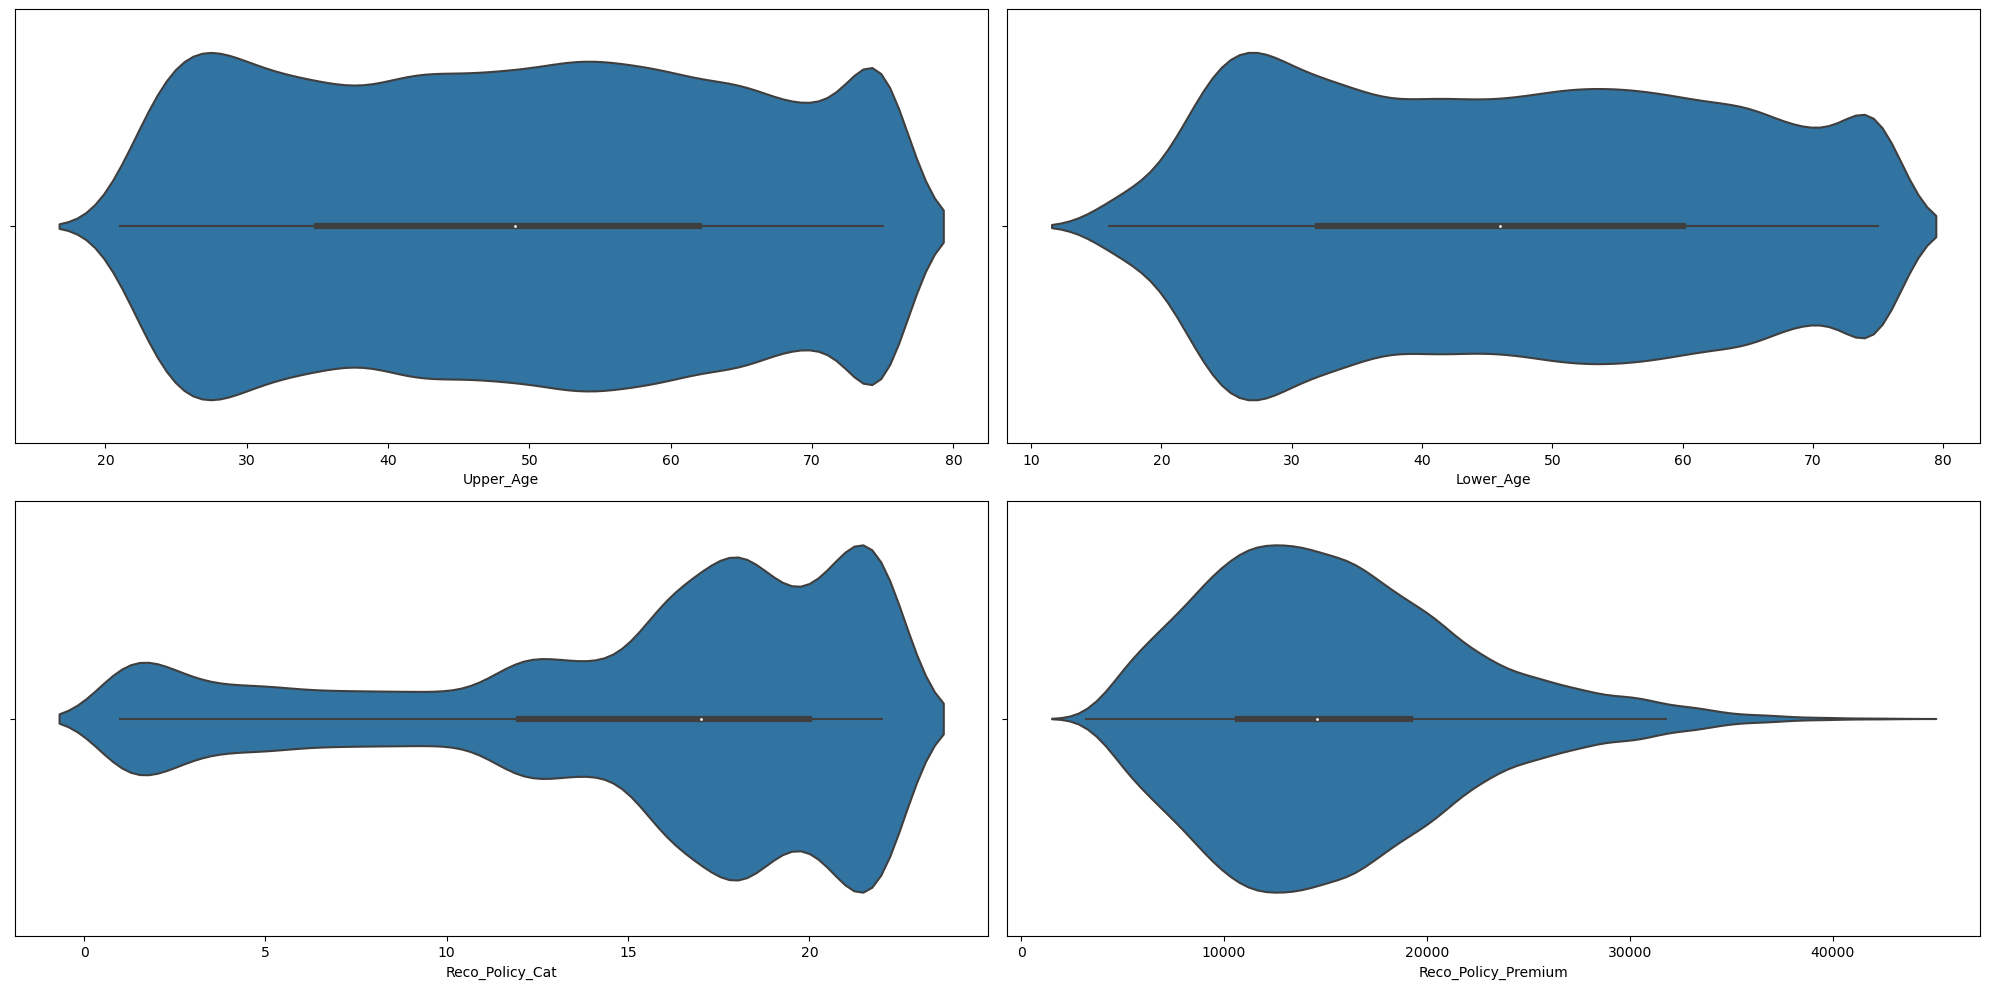

In [15]:
num_vars = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Cat', 'Reco_Policy_Premium']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

<Axes: xlabel='Upper_Age', ylabel='Reco_Policy_Premium'>

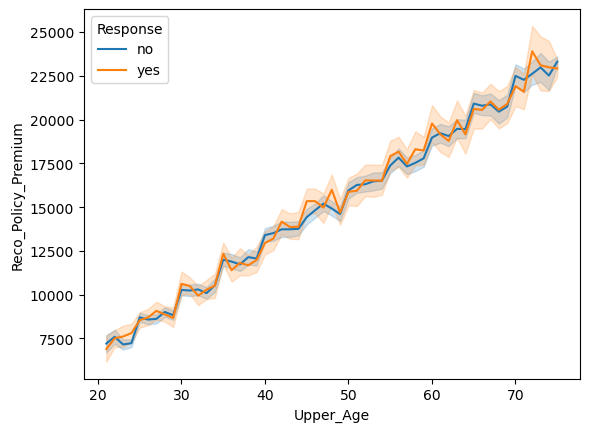

In [16]:
sns.lineplot(x='Upper_Age', y='Reco_Policy_Premium',
             hue='Response', data=data)

## sns.lineplot(x='Lower_Age', y='Reco_Policy_Premium', 
                hue='Response', data=data)